In [1]:
import pandas as pd
BlendDF = pd.read_csv('BlendedReviews.csv') 

In [2]:

import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import multiprocessing


from sklearn import utils
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import StackingClassifier

In [3]:
"""
VADER Score
First group of models are binary models predicting positive or negative rating
"""

#Split data into training and test sets with a 80/20 split for all binary models
X = BlendDF[['VaderCompound','Short','Verified','Long','IsImage']] #set independent variables for regression
Y = BlendDF['BinaryRating'] #set dependent variable for regression
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1) #Split into 80/20 train and test sets

#Run binary logistic regression
LR = linear_model.LogisticRegression(solver='lbfgs',max_iter=10000)
LR.fit(X_train, Y_train)
print('Binary Logistic Intercept is:', LR.intercept_, '\n')
print('Binary Logistic Coefficients are:', LR.coef_, '\n')

#Look at ability of model to predict test set
LRScore = round((LR.score(X_test, Y_test))*100,2)
print('Binary Logistic Model Score for VADER Score:',LRScore,'%','\n')
Y_pred = LR.predict(X_test)
print(classification_report(Y_test, Y_pred, zero_division=0), '\n')

#Run Binary SVM
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, Y_train)

#Look at ability of model to predict test set
SVMScore = round((svclassifier.score(X_test, Y_test))*100,2)
print('Binary SVM Score for VADER Score:',SVMScore,'%','\n')
Y_pred = svclassifier.predict(X_test)
print(classification_report(Y_test, Y_pred, zero_division=0), '\n')

#Run Naive Bayes Classifier
NB = GaussianNB()
NB.fit(X_train, Y_train)

#Look at ability of model to predict test set
NBScore = round((NB.score(X_test, Y_test))*100,2)
print('Binary Naive Bayes Classifier Score for VADER Score:',NBScore,'%','\n')
Y_pred = NB.predict(X_test)
print(classification_report(Y_test, Y_pred, zero_division=0), '\n')

#Implement stacked ensemble model
Estimators = [('NB',NB), ('SVM',svclassifier)]
StackedModel = StackingClassifier (estimators = Estimators, final_estimator = linear_model.LogisticRegression(solver='lbfgs',max_iter=10000))
StackedModel.fit(X_train, Y_train)

#Look at ability of stacked ensemble model to predict test set
StackScore = round((StackedModel.score(X_test, Y_test))*100,2)
print('Stacked ensemble model score for VADER Score: ',StackScore,'%','\n')
Y_pred = StackedModel.predict(X_test)
print(classification_report(Y_test, Y_pred, zero_division=0), '\n')

Binary Logistic Intercept is: [-2.93283619] 

Binary Logistic Coefficients are: [[ 1.13646842  0.71941238  0.30250035 -0.28279908 -0.48483695]] 

Binary Logistic Model Score for VADER Score: 84.55 % 

              precision    recall  f1-score   support

           0       0.58      0.32      0.42      2127
           1       0.87      0.95      0.91     10407

    accuracy                           0.85     12534
   macro avg       0.73      0.64      0.66     12534
weighted avg       0.82      0.85      0.83     12534
 

Binary SVM Score for VADER Score: 84.44 % 

              precision    recall  f1-score   support

           0       0.58      0.31      0.40      2127
           1       0.87      0.95      0.91     10407

    accuracy                           0.84     12534
   macro avg       0.72      0.63      0.66     12534
weighted avg       0.82      0.84      0.82     12534
 

Binary Naive Bayes Classifier Score for VADER Score: 83.96 % 

              precision    recall 

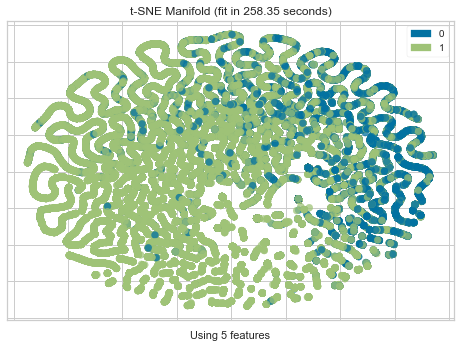

<AxesSubplot:title={'center':'t-SNE Manifold (fit in 258.35 seconds)'}, xlabel='Using 5 features'>

In [4]:
from yellowbrick.features import Manifold
viz = Manifold(manifold="tsne")
viz.fit_transform(X, Y) 
viz.show()

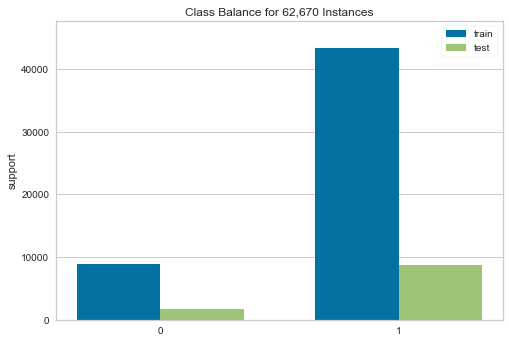

<AxesSubplot:title={'center':'Class Balance for 62,670 Instances'}, ylabel='support'>

In [5]:
from sklearn.model_selection import TimeSeriesSplit
from yellowbrick.target import ClassBalance

tscv = TimeSeriesSplit()
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

visualizer = ClassBalance()

visualizer.fit(Y_train, Y_test)       
visualizer.show()                      

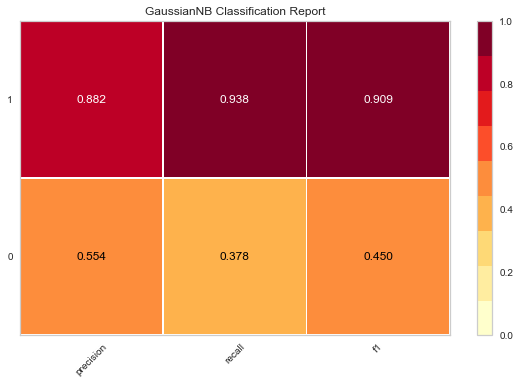

<AxesSubplot:title={'center':'GaussianNB Classification Report'}>

In [6]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ClassificationReport

tscv = TimeSeriesSplit()
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

model = GaussianNB()
visualizer = ClassificationReport(model, support=False)

visualizer.fit(X_train, Y_train)      
visualizer.score(X_test, Y_test)        
visualizer.show()                       

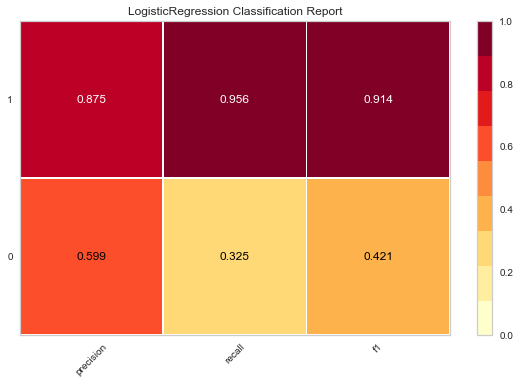

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [7]:
from yellowbrick.classifier import ClassificationReport
from sklearn.linear_model import LogisticRegression
viz = ClassificationReport(LogisticRegression())
viz.fit(X_train, Y_train)
viz.score(X_test, Y_test)
viz.show()


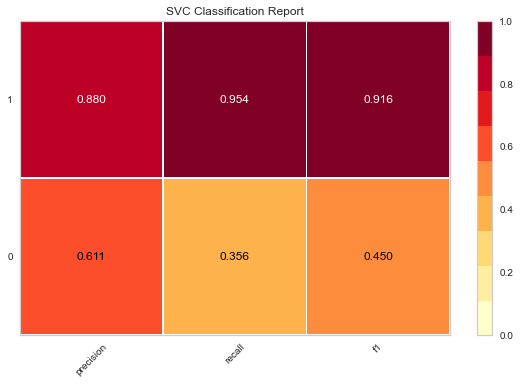

<AxesSubplot:title={'center':'SVC Classification Report'}>

In [8]:
from yellowbrick.classifier import ClassificationReport
viz = ClassificationReport(SVC())
viz.fit(X_train, Y_train)
viz.score(X_test, Y_test)
viz.show()

In [10]:
"""
VADER Score
Second group of models are multiclass models for 1-5 rating
"""
#Split data into training and test sets with a 80/20 split for multiclass models
X = BlendDF[['VaderCompound','Short','Verified','Long','IsImage']] #set independent variables for regression
Y = BlendDF['overall'] #set dependent variable for regression
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1) #Split into 80/20 train and test sets

#Run multinomial logistic regression
MLR = linear_model.LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=10000)
MLR.fit(X_train, Y_train)

#Look at ability of model to predict test set
MLRScore = round((MLR.score(X_test, Y_test))*100,2)
print('Multinomial Logistic Model Score for VADER Score: ',MLRScore,'%','\n')
Y_pred = MLR.predict(X_test)
print(classification_report(Y_test, Y_pred, zero_division=0), '\n')

#Run Multiclass SVM
msvclassifier = SVC(kernel='linear')
msvclassifier.fit(X_train, Y_train)

#Look at ability of model to predict test set
MSVMScore = round((msvclassifier.score(X_test, Y_test))*100,2)
print('Multiclass SVM Score is for VADER Score: ',MSVMScore,'%','\n')
Y_pred = msvclassifier.predict(X_test)
print(classification_report(Y_test, Y_pred, zero_division=0), '\n')

#Run K Nearest Neighbors Algorithm
KNN = KNeighborsClassifier(n_neighbors = 15)
KNN.fit(X_train, Y_train)

#Look at ability of model to predict test set
KNNScore = round((KNN.score(X_test, Y_test))*100,2)
print('K Nearest Neighbors Algorithm Model Score for VADER Score: ',KNNScore,'%','\n')
Y_pred = KNN.predict(X_test)
print(classification_report(Y_test, Y_pred, zero_division=0), '\n')

#Run Random Forest Algorithm
RF = RandomForestClassifier(n_estimators=5, random_state=0)
RF.fit(X_train, Y_train)

#Look at ability of model to predict test set
RFScore = round((RF.score(X_test, Y_test))*100,2)
print('Random Forest Classifier Model Score for VADER Score: ',RFScore,'%','\n')
Y_pred = RF.predict(X_test)
print(classification_report(Y_test, Y_pred, zero_division=0), '\n')

#Implement stacked ensemble model
Estimators = [('KNN',KNN), ('SVM',msvclassifier)]
StackedModel = StackingClassifier (estimators = Estimators, final_estimator = linear_model.LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=10000))
StackedModel.fit(X_train, Y_train)

#Look at ability of stacked ensemble model to predict test set
StackScore = round((StackedModel.score(X_test, Y_test))*100,2)
print('Stacked ensemble model score for VADER Score: ',StackScore,'%','\n')
Y_pred = StackedModel.predict(X_test)
print(classification_report(Y_test, Y_pred, zero_division=0), '\n')

Multinomial Logistic Model Score for VADER Score:  62.73 % 

              precision    recall  f1-score   support

           1       0.41      0.46      0.43      1445
           2       0.00      0.00      0.00       682
           3       0.00      0.00      0.00       999
           4       0.00      0.00      0.00      1921
           5       0.66      0.96      0.78      7487

    accuracy                           0.63     12534
   macro avg       0.21      0.28      0.24     12534
weighted avg       0.44      0.63      0.52     12534
 

Multiclass SVM Score is for VADER Score:  62.53 % 

              precision    recall  f1-score   support

           1       0.41      0.44      0.42      1445
           2       0.00      0.00      0.00       682
           3       0.00      0.00      0.00       999
           4       0.00      0.00      0.00      1921
           5       0.66      0.96      0.78      7487

    accuracy                           0.63     12534
   macro avg    

D:\Anaconda 2\envs\DSC\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda 2\envs\DSC\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


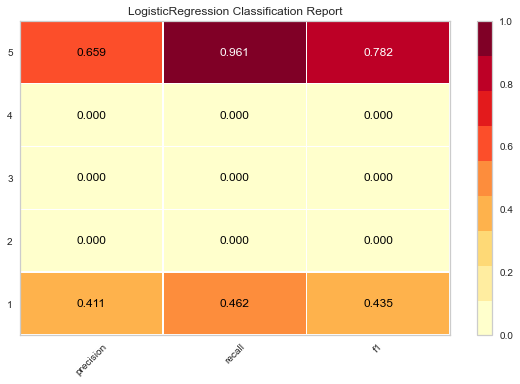

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [11]:
from yellowbrick.classifier import ClassificationReport
from sklearn.linear_model import LogisticRegression
viz = ClassificationReport(LogisticRegression())
viz.fit(X_train, Y_train)
viz.score(X_test, Y_test)
viz.show()

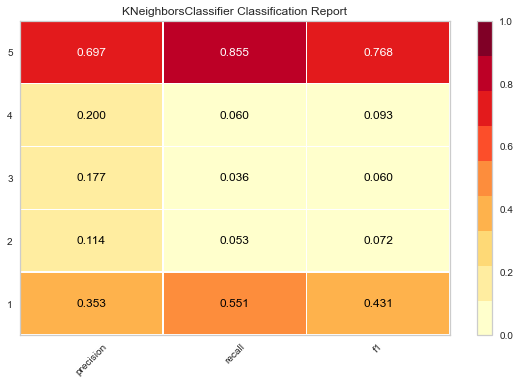

<AxesSubplot:title={'center':'KNeighborsClassifier Classification Report'}>

In [12]:
from yellowbrick.classifier import ClassificationReport
viz = ClassificationReport(KNeighborsClassifier(n_neighbors = 15))
viz.fit(X_train, Y_train)
viz.score(X_test, Y_test)
viz.show()

D:\Anaconda 2\envs\DSC\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


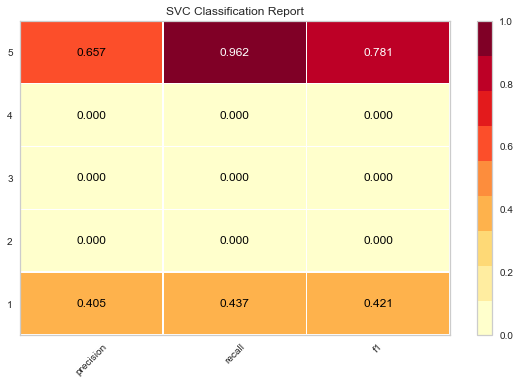

<AxesSubplot:title={'center':'SVC Classification Report'}>

In [13]:
from yellowbrick.classifier import ClassificationReport
viz = ClassificationReport(SVC(kernel='linear'))
viz.fit(X_train, Y_train)
viz.score(X_test, Y_test)
viz.show()

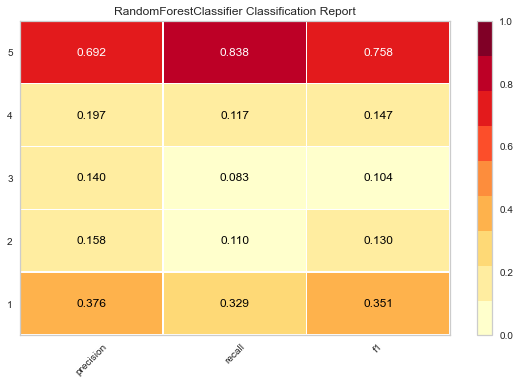

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [14]:
from yellowbrick.classifier import ClassificationReport
viz = ClassificationReport(RandomForestClassifier(n_estimators=5, random_state=0))
viz.fit(X_train, Y_train)
viz.score(X_test, Y_test)
viz.show()

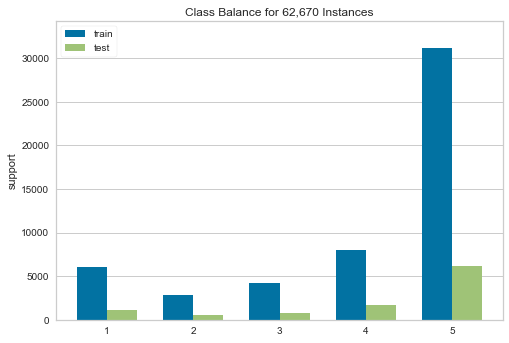

<AxesSubplot:title={'center':'Class Balance for 62,670 Instances'}, ylabel='support'>

In [16]:
from sklearn.model_selection import TimeSeriesSplit
from yellowbrick.target import ClassBalance

# Create the training and test data
tscv = TimeSeriesSplit()
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

# Instantiate the visualizer
visualizer = ClassBalance()

visualizer.fit(Y_train, Y_test)        # Fit the data to the visualizer
visualizer.show()                      